<a href="https://colab.research.google.com/github/Julidmz/Data_Inmersion/blob/main/DATA_INMERSION_AULA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 2

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [36]:
columnas = {
    'Baños': 'Banos',
    'Área': 'Area'
}

inmuebles = inmuebles.rename(columns=columnas)

In [37]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
8484,Apartamento,Apartamento en venta en Barrios Unidos,1,1,42,Barrios Unidos,Los Andes,$ 456.820.992
7797,Apartamento,Apartamento en venta en Chapinero,3,3,202,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000
8504,Apartamento,Apartamento en venta en Teusaquillo,2,3,130,Teusaquillo,Teusaquillo,$ 450.000.000
5404,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,87,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 419.999.999
810,Casa,Casa en venta en El Chicó,5,5,457,El Chicó,CHAPINERO: Chicó Lago + El Refugio,$ 3.500.000.000


In [38]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [39]:
inmuebles.Valor[0]

'$ 360.000.000'

In [40]:
type(inmuebles.Valor[0])

str

In [41]:
inmuebles.Valor[0]+inmuebles.Valor[1]

#Cuando trabajamos con strings, pandas en vez de sumar concatena los datos

'$ 360.000.000$ 670.000.000'

In [42]:
inmuebles.Valor[0].split()

#La funcion split hace la separacion del espacio en blanco, y me devuelve una lista con dos elementos.
#Separa cadenas de texto que estan separadas por espacio en blanco

['$', '360.000.000']

In [43]:
inmuebles.Valor.str.split()

#Convertimos toda la columna inmuebles.Valor en string, ya que inmuebles.Valor por si solo es un tipo panda series.

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [44]:
type(inmuebles.Valor.str.split())

#Sigue siendo un formato panda series, pero ahora cada elemento de ese panda series me lo devuelve en un formato de lista

pandas.core.series.Series

In [45]:
#Hacemos un split pero lo trabajamos como dataframe
inmuebles.Valor.str.split(expand=True)

#Con el parametro expand = True, ya no me devuelve cada elemento en forma de lista, ni series, sino convertido en formato de DataFrame
#La primera columna (0) va a contener el valor $, y la segunda columna(1) va a contener los valores del precio de los inmuebles.

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [46]:
#Creamos una nueva variable llamada valor que va a contener la columna inmueble.Valor en formato DataFrame
valor = inmuebles.Valor.str.split(expand=True)

#Luego, creamos dos nuevas columnas (Moneda y Precio), moneda va sustituir a la columna 0 , precio a la columna 1 del DataFrame creado de inmuebles.Valor
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
394,Apartamento,Apartamento en venta en Tintala,3,2,54,Tintala,Tintala,$ 162.000.000,$,162.000.000
3319,Casa,Casa en venta en Kennedy,7,5,280,Kennedy,Kennedy Central,$ 390.000.000,$,390.000.000
2371,Apartamento,Apartamento en venta en Suba,3,2,74,Suba,Suba,$ 327.900.000,$,327.900.000


In [47]:
inmuebles.info()

#Con la funcion info() podemos ver la cantidad de columnas que tenemos y corroborar que se crearon las columnas Moneda y Precio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [48]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) 
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [49]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [50]:
#Procedemos a cambiar el tipo de dato de Precio a valor numerico
#Creamos una nueva variable llamada Precio Millon, y adentro le indicamos por medio de la funcion astype que queremos cambiar el tipo de dato Precio de objeto a float, y lo dividimos por 1 millon, para hacer que los valores se vean mas legibles, pero entendiendo que estamos hablando de valores que son millones.
inmuebles['Precio Millon'] = inmuebles.Precio.astype('float')/1000000
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [51]:
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio Millon
743,Casa,Casa en venta en Puente Aranda,5,4,136,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 400.000.000,$,400000000,400.00
8275,Apartamento,Apartamento en venta en Santa Barbara,2,2,66,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 340.000.000,$,340000000,340.00
7065,Casa,Casa en venta en Suba,2,1,50,Suba,Suba,$ 139.000.000,$,139000000,139.00


In [52]:
inmuebles.describe()

#La funcion describe() nos devuelve este dataframe con: el conteo de filas que tenemos, el promedio, el desvio estandard, el valor minimo, el 25%, el 50%, el 75 % y el valor maximo.

,Habitaciones,Banos,Area,Precio Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [53]:
#Vamos a cambiar la visualizacion de los datos cuando los vemos mediante describe(), vamos a sintetizarlos

#Usamos la funcion set_options, y entre parentesis y abrimos comillas colocamos un parametro que se llama display, precision y luego una ,2 para indicarle que queremos que sea de una precision de dos decimales.
pd.set_option('display.precision',2)

#Volvemos a utilizar la funcion set_options, y adentro del parentesis ingresamos el parametro: display.float.format
#Colocamos la funcion lambda que es una funcion que se aplica para especificar algo: en este caso especificamos %.2f (2 decimales float), y esto es aplicado a x.
pd.set_option('display.float.format', lambda x: '%.2f' % x)

#Volvemos a visualizar el dataset mediante la funcion describe(), y podemos ver que los valores son mas legibles y estan mas sintetizados.
inmuebles.describe()

,Habitaciones,Banos,Area,Precio Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [54]:
#Utilizamos la funcion loc para localizar los inmuebles que contienen 110 habitaciones
#Tambien utilizamos un condicional
inmuebles.loc[inmuebles.Habitaciones == 110]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [55]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

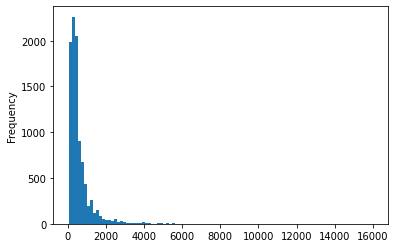

In [56]:
#Graficamos con un plot de histograma el atributo Precio Millon, especificando un parametro de bins = 100 que nos permite especificar el rango que vamos a abarcar dentro del histograma
inmuebles['Precio Millon'].plot.hist(bins=100)

#En el eje X tenemos el precio de los inmuebles en millones de pesos
#En el eje Y tenemos la frecuencia del valor de los inmuebles

#El problema con este tipo de visualizacion es que no nos permite ver la informacion de manera mas consisa y clara.
#Pandas nos permite hacer un buen tratamiento de los datos, pero no nos permite visualizar de forma correcta la informacion.

#Utilizacion de las librerias MatPlotlib y Seaborn para mejor visualizacion de los datos

In [57]:
#Importamos las librerias de matplotlib y seaborn
import matplotlib.pyplot as plt
import seaborn as sns

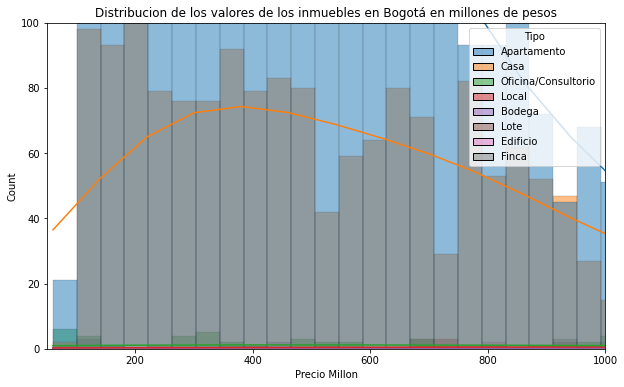

In [70]:
#Creamos un liendo: plt.figure, y adentro de colocamos el parametro figsize que es el tamaño de la figura, y va a contener los tamaños: 10 es el ancho, y el 6 la altura del lienzo
#Es una superficie de dos dimensiones donde vamos a definir la grafica 
plt.figure(figsize=(10,6))

#Utilizamos la abreviatura sns, seguida de . y el histograma y adentro como parametros creamos el datagrame inmuebles, y al eje x le indicamos el atriburo Precio_Millon
#Tenemos el recurso de una cursa de densidad que nos permite ver el comportamiento de esta distribucion conocida como Kernel Density = kde=True
#Tenemos el recurso hue que lo utilizamos como parametro para incorporar otras variables mirando el precio, en este caso TIPO , y nos añade la dimension del tipo de inmueble.
grafica = sns.histplot(data=inmuebles, x = 'Precio Millon', kde=True, hue='Tipo')

grafica.set_title('Distribucion de los valores de los inmuebles en Bogotá en millones de pesos')
#Para mejorar el codigo creamos la variable grafica que va a contener el histograma con el dataframe, y el atributo x, y creamos un titulo para indicar sobre que trata el grafico.


#Con plt.xlim, estamos configurando el limite minimo y maximo para entender mejor ese grafico de distribucion, esto nos permite sacar mejores conclusiones
plt.xlim((50,1000))

#Con plt.ylim, podemos limitar o aumentar la frecuencia para poder observar tanto mas ampliamente como mas consisamente los datos que no se pueden observar a simple vista, basicamente es como hacer un zoom.
plt.ylim((0,100))

#Con plt.savefig creamos una ruta para guardar este archivo en formato png
plt.savefig('/content/drive/MyDrive/valor_inmuebles.png',format='png')

plt.show()

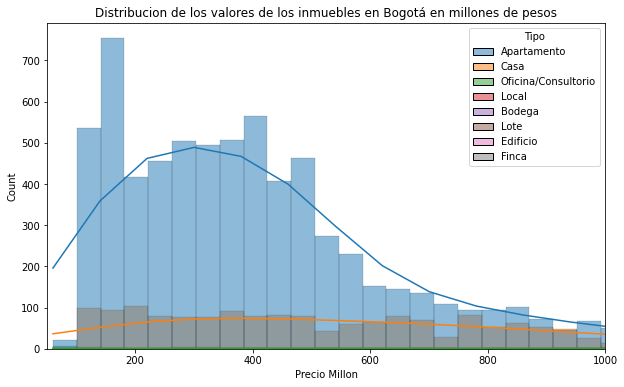

In [71]:
plt.figure(figsize=(10,6))

grafica = sns.histplot(data=inmuebles, x = 'Precio Millon', kde=True, hue='Tipo')

grafica.set_title('Distribucion de los valores de los inmuebles en Bogotá en millones de pesos')

plt.xlim((50,1000))

plt.show()